### 다중 회귀

1) 다항 회귀 <br>
**다항식**을 사용하여 특성과 타깃 사이의 관계를 나타낸다. 

2) 다중 회귀 <br>
하나의 특성이 아니라 **여러 개의 특성**을 사용한 선형 회귀

#### 특성 공학

여러 개의 특성을 사용하는데 특성을 제곱하는 특성, 각 특성을 서로 곱해서 또 다른 특성을 만들어 내는 것<br>
즉, 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 **특성 공학**이라고 합니다.

#### 판다스의 데이터프레임

데이터프레임은 판다스의 핵심 데이터 구조입니다.

In [5]:
import pandas as pd

df = pd.read_csv('http://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full.shape)

(56, 3)


In [6]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [17]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
poly.get_feature_names()

(42, 9)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [18]:
test_poly = poly.transform(test_input)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [20]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

(42, 55)


In [21]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991097
-144.40579242684848


#### 규제(Regression)

**규제**는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것이다.<br>
즉, 모델이 훈련 세트에 과대적합되지 않도록 만드는 것이다.<br>
선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일이다.<br>

#### 특성의 스케일

특성의 스케일이 **정규화**되지 않으면 여기에 곱해지는 계수 값도 차이가 나기 때문이다.
선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않는다.
그렇다면 규제를 적용하기 전에 먼저 정규화를 해야한다.

1) 표준점수<br>
2) sklearn의 StandardScaler 클래스

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly) # (42, 55)의 특성
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615388


In [31]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

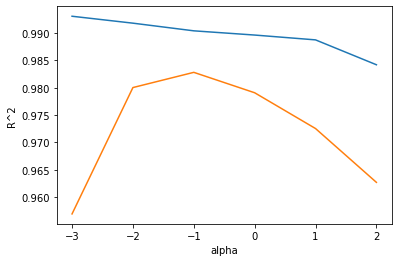

In [32]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


# 그래프의 왼쪽 : train set에 너무 잘 맞고, test set에 안맞는 "과대적합"
# 그래프의 오른쪽 : train set와 test set이 점점 아래로 가는 "과소적합"
# alpha = 0.1인 경우가 가장 최적의 variance

In [33]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.982797646538695


### 라쏘 회귀

라쏘 모델의 경우 계수를 0으로 만들 수 있다. 즉, 유용한 특성을 골라내는 용도로 사용할 수 있다

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [37]:
train_score = []
test_score = []

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/Users/seongyeonkim/Documents/혼공/ML/실습/myvenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939808, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/seongyeonkim/Documents/혼공/ML/실습/myvenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475122, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/seongyeonkim/Documents/혼공/ML/실습/myvenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926333242, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate

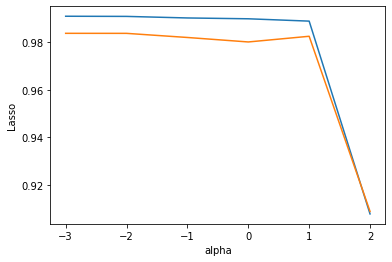

In [38]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('Lasso')
plt.show()

In [39]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [40]:
print(np.sum(lasso.coef_ == 0))

40
